# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/sonalb22/customer_churn_model/master/Churn.csv")

### Understanding the data

In [4]:
#Looking at data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#dimensions of the data(no.of rows and columns in the datatset)
data.shape

(7043, 21)

In [6]:
#data type of each attribute
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.columns

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')

In [14]:
#to check what type of data values does the datatset contains
for i in data.columns:
    if i !="customerID":
        print(i +" : ",data[i].unique())

('gender : ', array(['Female', 'Male'], dtype=object))
('SeniorCitizen : ', array([0, 1], dtype=int64))
('Partner : ', array(['Yes', 'No'], dtype=object))
('Dependents : ', array(['No', 'Yes'], dtype=object))
('tenure : ', array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64))
('PhoneService : ', array(['No', 'Yes'], dtype=object))
('MultipleLines : ', array(['No phone service', 'No', 'Yes'], dtype=object))
('InternetService : ', array(['DSL', 'Fiber optic', 'No'], dtype=object))
('OnlineSecurity : ', array(['No', 'Yes', 'No internet service'], dtype=object))
('OnlineBackup : ', array(['Yes', 'No', 'No internet service'], dtype=object))
('DeviceProtection : ', array(['No', 'Yes', 'No internet service'], 

In [ ]:
#it contains both numerical as well as categorical data

In [15]:
#class distribution
class_counts=data.groupby('Churn').size()
print(class_counts)

Churn
No     5174
Yes    1869
dtype: int64


### Data Manipulation

In [16]:
#customer_id does not play any role in determining churn of a customer,so we drop it
data.drop(['customerID'], axis=1, inplace=True)

In [17]:
#Convert "NO internet Services " to "No" in given columns
col=["OnlineSecurity","OnlineBackup"  ,"DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for i in col:
    data[i]=data[i].replace({"No internet service":"No"})

In [18]:
data['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
#drop all spaces in TotalCharges with null values
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

In [20]:
#to get the count of null values in each column
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
#Drop all null values 
data.dropna(inplace=True)

In [22]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'])

In [24]:
data['TotalCharges'].dtype

dtype('float64')

In [26]:
data['MonthlyCharges'].dtype

dtype('float64')

In [27]:
#converting object into category 
data['gender']=data['gender'].astype('category')
data['Partner']=data['Partner'].astype('category')
data['Dependents']=data['Dependents'].astype('category')
data['PhoneService']=data['PhoneService'].astype('category')
data['MultipleLines']=data['MultipleLines'].astype('category')
data['InternetService']=data['InternetService'].astype('category')
data['OnlineSecurity']=data['OnlineSecurity'].astype('category')
data['OnlineBackup']=data['OnlineBackup'].astype('category')
data['DeviceProtection']=data['DeviceProtection'].astype('category')
data['TechSupport']=data['TechSupport'].astype('category')
data['StreamingTV']=data['StreamingTV'].astype('category')
data['StreamingMovies']=data['StreamingMovies'].astype('category')
data['Contract']=data['Contract'].astype('category')
data['PaymentMethod']=data['PaymentMethod'].astype('category')
data['PaperlessBilling']=data['PaperlessBilling'].astype('category')

data['Churn']=data['Churn'].astype('category')

In [28]:
data.dtypes

gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#encoding all categorical data using label encoding

In [30]:
cat_columns=data.select_dtypes(['category']).columns

In [31]:
cat_columns

Index([u'gender', u'Partner', u'Dependents', u'PhoneService', u'MultipleLines',
       u'InternetService', u'OnlineSecurity', u'OnlineBackup',
       u'DeviceProtection', u'TechSupport', u'StreamingTV', u'StreamingMovies',
       u'Contract', u'PaperlessBilling', u'PaymentMethod', u'Churn'],
      dtype='object')

In [37]:
data[cat_columns]=data[cat_columns].apply(lambda x: x.cat.codes)

In [38]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Data Visualization

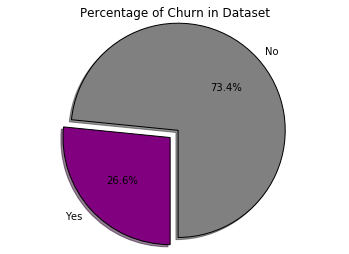

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
# Data to plot
sizes = data['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
labels = ["No","Yes"]
explode = [0,0.1]

# Plot
plt.pie(sizes, labels=labels,explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.axis('equal')
plt.show()

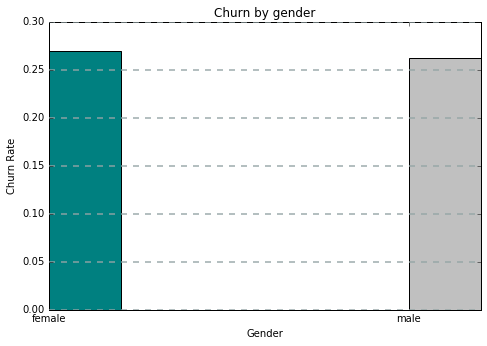

In [47]:
# plotting relation between gender and churn
plot_by_gender=data.groupby('gender').Churn.mean().reset_index()
x=plot_by_gender['gender']
y=plot_by_gender['Churn']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width=0.2,color=['Teal','silver'],tick_label=['female','male'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
string=x
plt.xlabel('Gender')
plt.title('Churn by gender')
plt.ylabel('Churn Rate')
plt.show()

In [48]:
#the female customer has slightly more churn rate

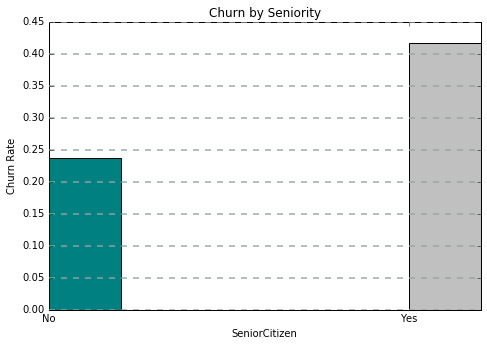

In [49]:
#plot by tech support
plot_by_seniority=data.groupby('SeniorCitizen').Churn.mean().reset_index()
x=plot_by_seniority['SeniorCitizen']
y=plot_by_seniority['Churn']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width=0.2,color=['Teal','silver'],tick_label=['No','Yes'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
string=x
plt.xlabel('SeniorCitizen')
plt.title('Churn by Seniority')
plt.ylabel('Churn Rate')
plt.show()

In [50]:
#senior citizens are more likely to churn

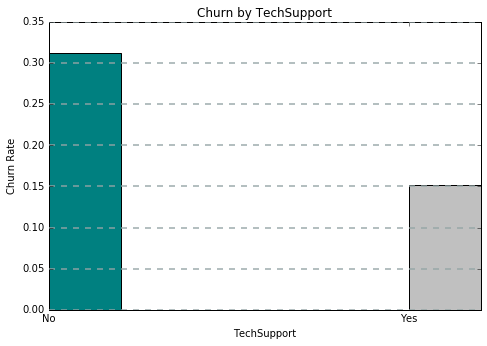

In [51]:
#plot by tech support
plot_by_TechSupport=data.groupby('TechSupport').Churn.mean().reset_index()
x=plot_by_TechSupport['TechSupport']
y=plot_by_TechSupport['Churn']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width=0.2,color=['Teal','silver'],tick_label=['No','Yes'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
string=x
plt.xlabel('TechSupport')
plt.title('Churn by TechSupport')
plt.ylabel('Churn Rate')
plt.show()

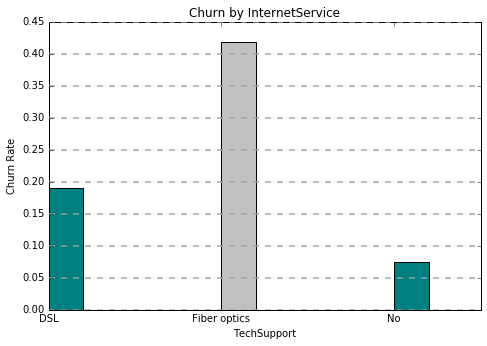

In [52]:
#plot by InternetService
plot_by_InternetService=data.groupby('InternetService').Churn.mean().reset_index()
x=plot_by_InternetService['InternetService']
y=plot_by_InternetService['Churn']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width=0.2,color=['Teal','silver'],tick_label=['DSL','Fiber optics', 'No'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
string=x
plt.xlabel('TechSupport')
plt.title('Churn by InternetService')
plt.ylabel('Churn Rate')
plt.show()

In [54]:
# people with fibre optics support are more likely to churn may be due to the higher cost

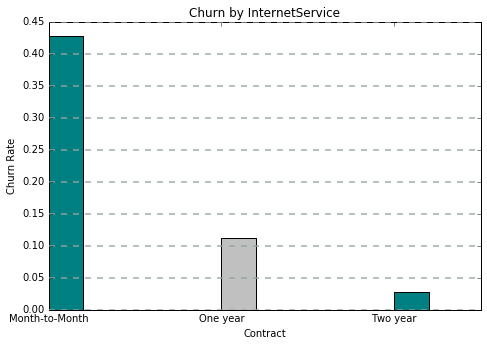

In [53]:
#plot by Contract
plot_by_Contract=data.groupby('Contract').Churn.mean().reset_index()
x=plot_by_Contract['Contract']
y=plot_by_Contract['Churn']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width=0.2,color=['Teal','silver'],tick_label=['Month-to-Month','One year','Two year'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
string=x
plt.xlabel('Contract')
plt.title('Churn by InternetService')
plt.ylabel('Churn Rate')
plt.show()

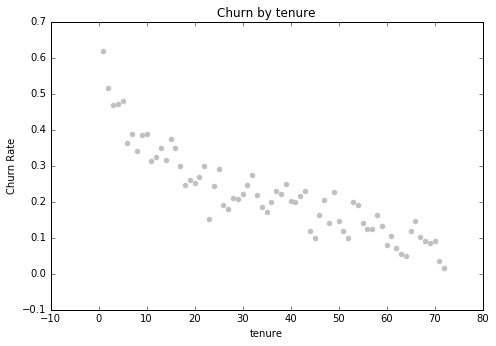

In [55]:
# visualisation relation between churn rate and tenure
plot_by_tenure=data.groupby('tenure').Churn.mean().reset_index()
x=plot_by_tenure['tenure']
y=plot_by_tenure['Churn']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.scatter(x,y,color='silver')


plt.xlabel('tenure')
plt.title('Churn by tenure')
plt.ylabel('Churn Rate')
plt.show()

In [56]:
### Conclusion: What all did you understand from the above charts
#1. the female customer has slightly more churn rate
#2. senior citizens are more likely to churn
#3. customers who dont contact Tech support are more likely to churn
#4. people with fibre optics support are more likely to churn , reason might be the cost
#5. monthly basis customers have more tendency to churn
#6. churn rate decreses with the increse in tenure

### Implement Machine Learning Models

In [57]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [58]:
#create X and Y: fetaures and labels
y=data['Churn']
X=data.drop(['Churn'],axis=1)

In [59]:
# perform feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns_for_scaling=['tenure','MonthlyCharges','TotalCharges']

data[columns_for_scaling]=sc.fit_transform(data[columns_for_scaling])

In [60]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,1,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,1,0,1,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,1,1,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,1,0,1,1,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [61]:
#spliting the dataset into train and test set respectively
X_train=X[:4000]
y_train=y[:4000]

In [62]:
X_test=X[4001:]
y_test=y[4001:]

In [64]:
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [65]:
 #preparing models using different machine learning algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

### Model Evaluation

In [66]:
#evaluate each model one by one
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    model.fit(X_train,y_train)
    result=model.score(X_test,y_test)
    results.append(result)
    names.append(name)
    msg="%s: %f " % (name, result.mean())
    print(msg)

LR: 0.801716 
KNN: 0.762455 
CART: 0.724183 
NB: 0.756846 
SVM: 0.768723 


### Final Conclusions

In [ ]:
#Logistic regression algorithm is the best performer among all other algorihms with the highest accuracy 
#rate of 80.17%.Therefore we will use this logistic regression model to predict churn of a customer further

#The ability to identify customers that aren’t happy with provided solutions will allow the company to learn 
#about product or pricing plan weak points, operation issues, as well as customer preferences and expectations 
#to proactively reduce reasons for churn.

#The important features that can plays an impprtant role to predict chrn rate are:
    #1.customers who dont contact Tech support are more likely to churn
    #2. people with fibre optics support are more likely to churn , reason might be the cost
    #3. monthly basis customers have more tendency to churn
    #4. churn rate decreses with the increse in tenure
    #5.Senior citizens and feamle customers are more likely to churn
# we can reduce the customer churn by providing good and low cost internet services,also we should give offers so as 
# to allow them to go with the company for a long tenure.
# As we will gain the trust of customers, the probability of them to stay with the company increases.